In [27]:
import numpy as np
import csv
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [2]:
today_time = datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S")

source_file = 'Quantized Speech JND - New_May 15, 2020_06.36.csv'
target_file = 'summary.csv'

ipaddress = "IPAddress"
duration = "Duration (in seconds)"
mTurk_id = "Q3.1"

comment = "Q35.1"
payment_que = "Q35.2"
payment_comment = "Q35.2_3_TEXT"

In [3]:
clean_clean = ["Q5.1_1","Q6.1_1","Q7.1_1","Q8.1_1","Q9.1_1"]
clean_0dot25 = ["Q10.1_1","Q11.1_1","Q12.1_1","Q13.1_1","Q14.1_1"]
clean_0dot0625 = ["Q15.1_1","Q16.1_1","Q17.1_1","Q18.1_1","Q19.1_1"]
clean_0dot015625 = ["Q20.1_1","Q21.1_1","Q22.1_1","Q23.1_1","Q24.1_1"]
clean_1 = ["Q25.1_1","Q26.1_1","Q27.1_1","Q28.1_1","Q29.1_1"]
clean_2 = ["Q30.1_1","Q31.1_1","Q32.1_1","Q33.1_1","Q34.1_1"]

que_number_cc = [1,6,11,16,21]
que_number_c0_25 = [2,7,12,17,22]
que_number_c0_0625 = [3,8,13,18,23]
que_number_c0_015625 = [4,9,14,19,24]
que_number_c1 = [5,10,15,20,25]
que_number_c2 = [26,27,28,29,30]

In [4]:
def isValid (queID, queNumber, qStep, data):
    '''
    return:
        0 -> invalid
        {-1,1} -> valid and value multiplier 
    '''
    randBool_tag = 'randBool'
    src_audio_tag = 'src_audio_Q'
    fs_tag = '_FS_'

    randBool = randBool_tag+str(queNumber)
    fs_qStep = fs_tag+qStep
    A = 'A'+str(queNumber)
    B = 'B'+str(queNumber)
    src_audio_QQ_A = "".join([src_audio_tag,str(queNumber),'_A'])
    src_audio_QQ_B = "".join([src_audio_tag,str(queNumber),'_B'])
    
    isRandOK = True
    isSrcAOK = True
    isSrcBOK = True

    #############################################
    # (clean-clean) pair
    if qStep == 'clean-clean':
#         print(fs_tag,src_audio_QQ_A,"->",data[src_audio_QQ_A],src_audio_QQ_B,"->",data[src_audio_QQ_B])
        if fs_tag in data[src_audio_QQ_A]:
            isSrcAOK = False
        if fs_tag in data[src_audio_QQ_B]:
            isSrcBOK = False
            
        if isRandOK and isSrcAOK and isSrcBOK:
            #print(fs_tag,src_audio_QQ_A,"->",data[src_audio_QQ_A],src_audio_QQ_B,"->",data[src_audio_QQ_B])
            return 1
        else:
            print('ERROR -> data validity failed!')
            return 0
    
    
    #############################################
    # (2,1,0.25,0.0625,0.015625,clean-clean) pair
    elif data[randBool]=="0":
        if data[B] != "":
            isRandOK = False
        if fs_qStep != data[A]:
            isRandOK = False
        if fs_qStep not in data[src_audio_QQ_A]:
            isSrcAOK = False
        if fs_qStep in data[src_audio_QQ_B]:
            isSrcBOK = False
            
    # (clean-2,1,0.25,0.0625,0.015625,clean) pair
    elif data[randBool]=="1":
        if data[A] != "":
            isRandOK = False
        if fs_qStep != data[B]:
            isRandOK = False
        if fs_qStep in data[src_audio_QQ_A]:
            isSrcBOK = False
        if fs_qStep not in data[src_audio_QQ_B]:
            isSrcAOK = False
    
    #print("isRandOK->",isRandOK,"isSrcAOK->",isSrcAOK,"isSrcBOK->",isSrcBOK)
#     print(randBool,"->",data[randBool],fs_qStep,A,"->",data[A],B,"->",data[B],
#       src_audio_QQ_A,"->",data[src_audio_QQ_A],src_audio_QQ_B,"->",data[src_audio_QQ_B])

    if isRandOK and isSrcAOK and isSrcBOK:
#         print(randBool,"->",data[randBool],fs_qStep,A,"->",data[A],B,"->",data[B],
#           src_audio_QQ_A,"->",data[src_audio_QQ_A],src_audio_QQ_B,"->",data[src_audio_QQ_B])
        return (1 if data[randBool]=="1" else -1)
    else:
        print('ERROR -> data validity failed!')
        return 0

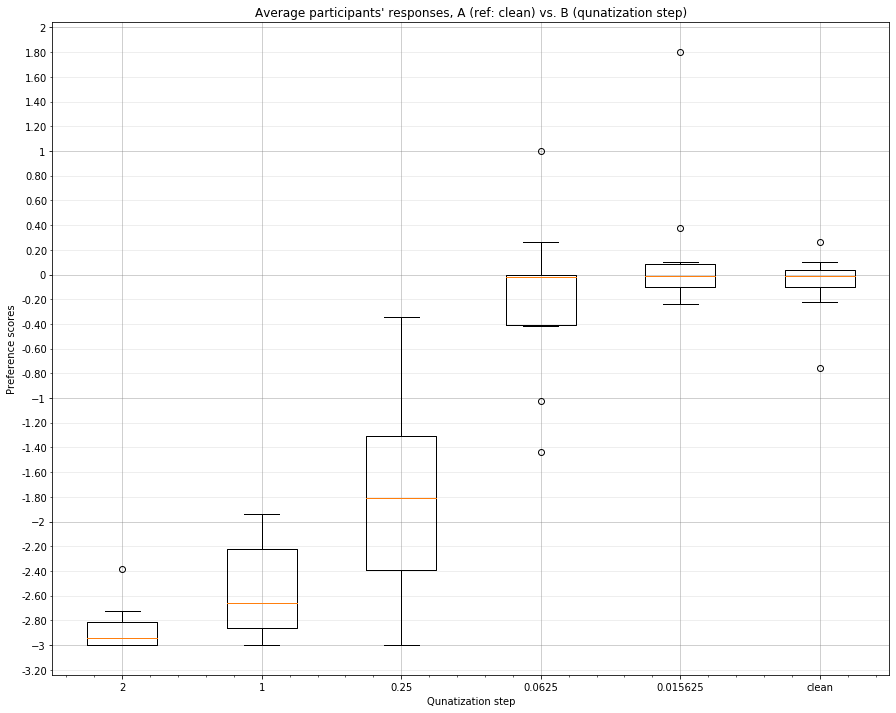

In [32]:
with open(target_file, mode = 'w') as writer_file:
    fieldnames = ['No.','mTurk_ID',ipaddress,'Duration','Pair_no','2','1','0.25','0.0625','0.015625','clean','Paypemt Appropiate?','Comment']
    writer = csv.DictWriter(writer_file, fieldnames=fieldnames)
    writer.writeheader()
    
    with open(source_file, mode = 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        
        all_avg_c2 = []
        all_avg_c1 = []
        all_avg_c0_25 = []
        all_avg_c0_0625 = []
        all_avg_c0_015625 = []
        all_avg_cc = []
        
        for enum,row in enumerate(csv_reader):
            c2 = []
            c1 = []
            c0_25 = []
            c0_0625 = []
            c0_015625 = []
            cc = []
        
            if enum>1 and row[mTurk_id]:
                for p,q in zip(clean_2,que_number_c2):
                    m = isValid(p,q,'2',row)
                    c2.append( m*float(row[p]) )
                    
                for p,q in zip(clean_1,que_number_c1):
                    m = isValid(p,q,'1',row)
                    c1.append( m*float(row[p]) )
                    
                for p,q in zip(clean_0dot25,que_number_c0_25):
                    m = isValid(p,q,'0.25',row)
                    c0_25.append( m*float(row[p]) )
                    
                for p,q in zip(clean_0dot0625,que_number_c0_0625):
                    m = isValid(p,q,'0.0625',row)
                    c0_0625.append( m*float(row[p]) )
                    
                for p,q in zip(clean_0dot015625,que_number_c0_015625):
                    m = isValid(p,q,'0.015625',row)
                    c0_015625.append( m*float(row[p]) )
                    
                for p,q in zip(clean_clean,que_number_cc):
                    m = isValid(p,q,'clean-clean',row)
                    cc.append( m*float(row[p]) )
                 

                if len(c2)==len(c1) and len(c1)==len(c0_25) and \
                len(c0_25)==len(c0_0625) and len(c0_0625)==len(c0_015625) and len(c0_015625)==len(cc):
                    
                    for p, (vc2,vc1,vc0_025,vc0_0625,vc0_015625,vcc) in \
                    enumerate(zip(c2,c1,c0_25,c0_0625,c0_015625,cc)):
                        t = datetime.timedelta(seconds=int(row[duration]))
                        payment = row[payment_comment] if row[payment_comment] != "" else row[payment_que]
                            
#                         print(enum, row[mTurk_id], row[ipaddress], t, p+1,vc2,vc1,vc0_025,vc0_0625,vc0_015625,
#                               vcc,payment,row[comment])
                                                          
                        d = {fieldnames[0]:enum, fieldnames[1]:row[mTurk_id],fieldnames[2]:row[ipaddress],
                            fieldnames[3]:t, fieldnames[4]:p+1, fieldnames[5]:vc2, fieldnames[6]:vc1, 
                            fieldnames[7]:vc0_025, fieldnames[8]:vc0_0625, fieldnames[9]:vc0_015625,
                            fieldnames[10]:vcc,fieldnames[11]:payment, fieldnames[12]:row[comment]
                            }
#                         print(d)
                        writer.writerow(d)
    
                all_avg_c2.append(np.mean(c2))
                all_avg_c1.append(np.mean(c1))
                all_avg_c0_25.append(np.mean(c0_25))
                all_avg_c0_0625.append(np.mean(c0_0625))
                all_avg_c0_015625.append(np.mean(c0_015625))
                all_avg_cc.append(np.mean(cc))
                
        data = [all_avg_c2,all_avg_c1,all_avg_c0_25,all_avg_c0_0625,all_avg_c0_015625,all_avg_cc]
        
        %matplotlib inline
        fig, ax = plt.subplots(figsize=(15, 12))
        ax.set_title('Average participants\' responses, A (ref: clean) vs. B (qunatization step)')
        ax.set_xlabel('Qunatization step')
        ax.set_ylabel('Preference scores')
        # Show the major grid lines with dark grey lines
        plt.grid(b=True, which='major', color='#888888', linestyle='-', alpha=0.5)

        # Show the minor grid lines with very faint and almost transparent grey lines
        plt.minorticks_on()
        ax.yaxis.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
        ax.yaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
        
        ax.boxplot(data,labels=['2','1','0.25','0.0625','0.015625','clean'])
        plt.show()
                

### DONE!